In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from datetime import datetime
from scipy.ndimage import gaussian_filter1d  # for inflection point analysis
import plotly.graph_objects as go  # for candlestick plot
import dates

<h1><b style="background:red; color: black"><i>NOTE: </b></i><span style="background: yellow; color: black">We still need banking tickers to be entered into data.py, and to rerun the file after</span></h1>

# We looked at stock data to see if covid affected it and found that it did

## Executive Summary / Overview of the project goals - Desiree

For our project, we chose to look at finance data to see how Covid affected the stock market. Our goal was to prove that Covid pandemic and the lockdowns it brought had a negative effect in the stock market and that this would be clearly visible as a significant change in stock prices during important phases of the pandemic. 
We selected 6 different industries: Hospitality, Telecom, Food and Beverage, Transportation, Banking, and Healthcare.
We used line graphs for an industry analysis and then chose ETFs (which are like baskets containing different stocks from the same sector) to create a bar graph that shows the percentage change in value for each sector.

With the line graphs, we found out that...

With the bar graphs, we were able to see that...


## Data Gathering and Cleaning - Crystal
pulled data from yahoo finance using yfinance library, created dataframes (saved to csv if you want to look), and analyzed the data

<h5 style="color: slategray">Section: Read CSVs</h5>

In [2]:
# Read Stocks CSV
stocks_hist = pd.read_csv("data/stocks.csv")
stocks_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock,Sector,Capital Gains
0,2018-08-07 00:00:00-04:00,18.775547,18.775547,18.531934,18.601538,7584900,0.0,0.0,HST,hospitality,NaN
1,2018-08-08 00:00:00-04:00,18.671144,18.923458,17.809801,17.879404,12959400,0.0,0.0,HST,hospitality,NaN
2,2018-08-09 00:00:00-04:00,17.862010,17.966415,17.792407,17.827208,11420100,0.0,0.0,HST,hospitality,NaN
3,2018-08-10 00:00:00-04:00,17.757603,17.818506,17.522691,17.635798,8288300,0.0,0.0,HST,hospitality,NaN
4,2018-08-13 00:00:00-04:00,17.635794,17.740198,17.383480,17.487886,6328700,0.0,0.0,HST,hospitality,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32270,2023-07-31 00:00:00-04:00,29.840000,30.320000,29.820000,29.969999,10253700,0.0,0.0,WBA,healthcare,NaN
32271,2023-08-01 00:00:00-04:00,29.969999,30.209999,29.440001,29.570000,6534100,0.0,0.0,WBA,healthcare,NaN
32272,2023-08-02 00:00:00-04:00,29.340000,30.780001,29.150000,30.670000,9523700,0.0,0.0,WBA,healthcare,NaN
32273,2023-08-03 00:00:00-04:00,30.719999,30.790001,30.010000,30.309999,6350600,0.0,0.0,WBA,healthcare,NaN


In [3]:
# convert csv read date string back to date
stocks_hist_date = stocks_hist.copy()
stocks_hist_date['Date'] = pd.to_datetime(stocks_hist['Date'])

In [4]:
# Read ETF CSV
etfs_hist = pd.read_csv("data/etf.csv")
etfs_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,ETF
0,2018-08-07 00:00:00-04:00,22.291012,22.364938,22.186802,22.240242,37900,0.0,0.0,0.0,FTXN
1,2018-08-08 00:00:00-04:00,21.985514,22.017577,21.919604,21.990858,2800,0.0,0.0,0.0,FTXN
2,2018-08-09 00:00:00-04:00,21.839445,21.955233,21.786003,21.786003,3900,0.0,0.0,0.0,FTXN
3,2018-08-10 00:00:00-04:00,21.732560,21.928511,21.723653,21.928511,4000,0.0,0.0,0.0,FTXN
4,2018-08-13 00:00:00-04:00,21.705841,21.892883,21.367382,21.367382,22100,0.0,0.0,0.0,FTXN
...,...,...,...,...,...,...,...,...,...,...
7537,2023-07-31 00:00:00-04:00,31.209999,31.260000,31.112000,31.165001,6800,0.0,0.0,0.0,FTXR
7538,2023-08-01 00:00:00-04:00,31.070000,31.070000,30.941000,31.049999,4000,0.0,0.0,0.0,FTXR
7539,2023-08-02 00:00:00-04:00,30.620001,30.670000,30.559999,30.660000,6600,0.0,0.0,0.0,FTXR
7540,2023-08-03 00:00:00-04:00,30.451000,30.549999,30.379999,30.480000,8200,0.0,0.0,0.0,FTXR


In [5]:
# convert csv read date string back to date
etfs_hist_date = etfs_hist.copy()
etfs_hist_date['Date'] = pd.to_datetime(etfs_hist['Date'])

## Approach to Achive Project Goals - Rajib
approach was to each choose a sector, etfs/indicies, create line graph
problems:
- covid started when markets were not open
- some indices had no/incomplete data for period 
- had to try several graphs to actually get to insights

## Results
bar graph - Rajib
line graphs - Vishnu & Theresa

### Bar Graph ETFs 
<b style="background: yellow; color: black">NOTE: </b>not yet configured for etfs_hist df, dates are hard coded here because of issues with conversion to datetime via pandas

In [6]:
# get % change per stock

stock_grp = stocks_hist_date.groupby("Stock")
tickers = stock_grp.max().index

pcnt_change = {"Prior":[], "During":[], "Post":[], "Total":[]}

# Start/End dates should follow the import from dates.py, but the pull from Yahoo is not playing well with date formatting
covid_start = "2020-03-13 00:00:00-04:00"
covid_end = "2021-08-13 00:00:00-04:00"

for ticker in tickers:

    first_prior = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist_date["Date"] == stocks_hist_date["Date"].min())]["Close"].max()  
    last_prior = stocks_hist_date.loc[(stocks_hist["Stock"] == ticker) &
                                (stocks_hist["Date"] == covid_start)]["Close"].max()
    pcnt_change["Prior"].append(100 * (last_prior - first_prior)/first_prior)
                                 
    
    first_during = stocks_hist_date.loc[(stocks_hist["Stock"] == ticker) &
                                (stocks_hist["Date"] == covid_start)]["Close"].max()
    last_during = stocks_hist_date.loc[(stocks_hist["Stock"] == ticker) &
                                (stocks_hist["Date"] == covid_end)]["Close"].max()
    pcnt_change["During"].append(100 * (last_during - first_during)/first_during)
                                 
                                 
    first_post = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist["Date"] == covid_end)]["Close"].max()
    last_post = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist_date["Date"] == stocks_hist_date["Date"].max())]["Close"].max()
    pcnt_change["Post"].append(100 * (last_post - first_post)/first_post)


    first_tot = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist_date["Date"] == stocks_hist_date["Date"].min())]["Close"].max()  
    last_tot = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist_date["Date"] == stocks_hist_date["Date"].max())]["Close"].max()
    pcnt_change["Total"].append(100 * (last_tot - first_tot)/first_tot)


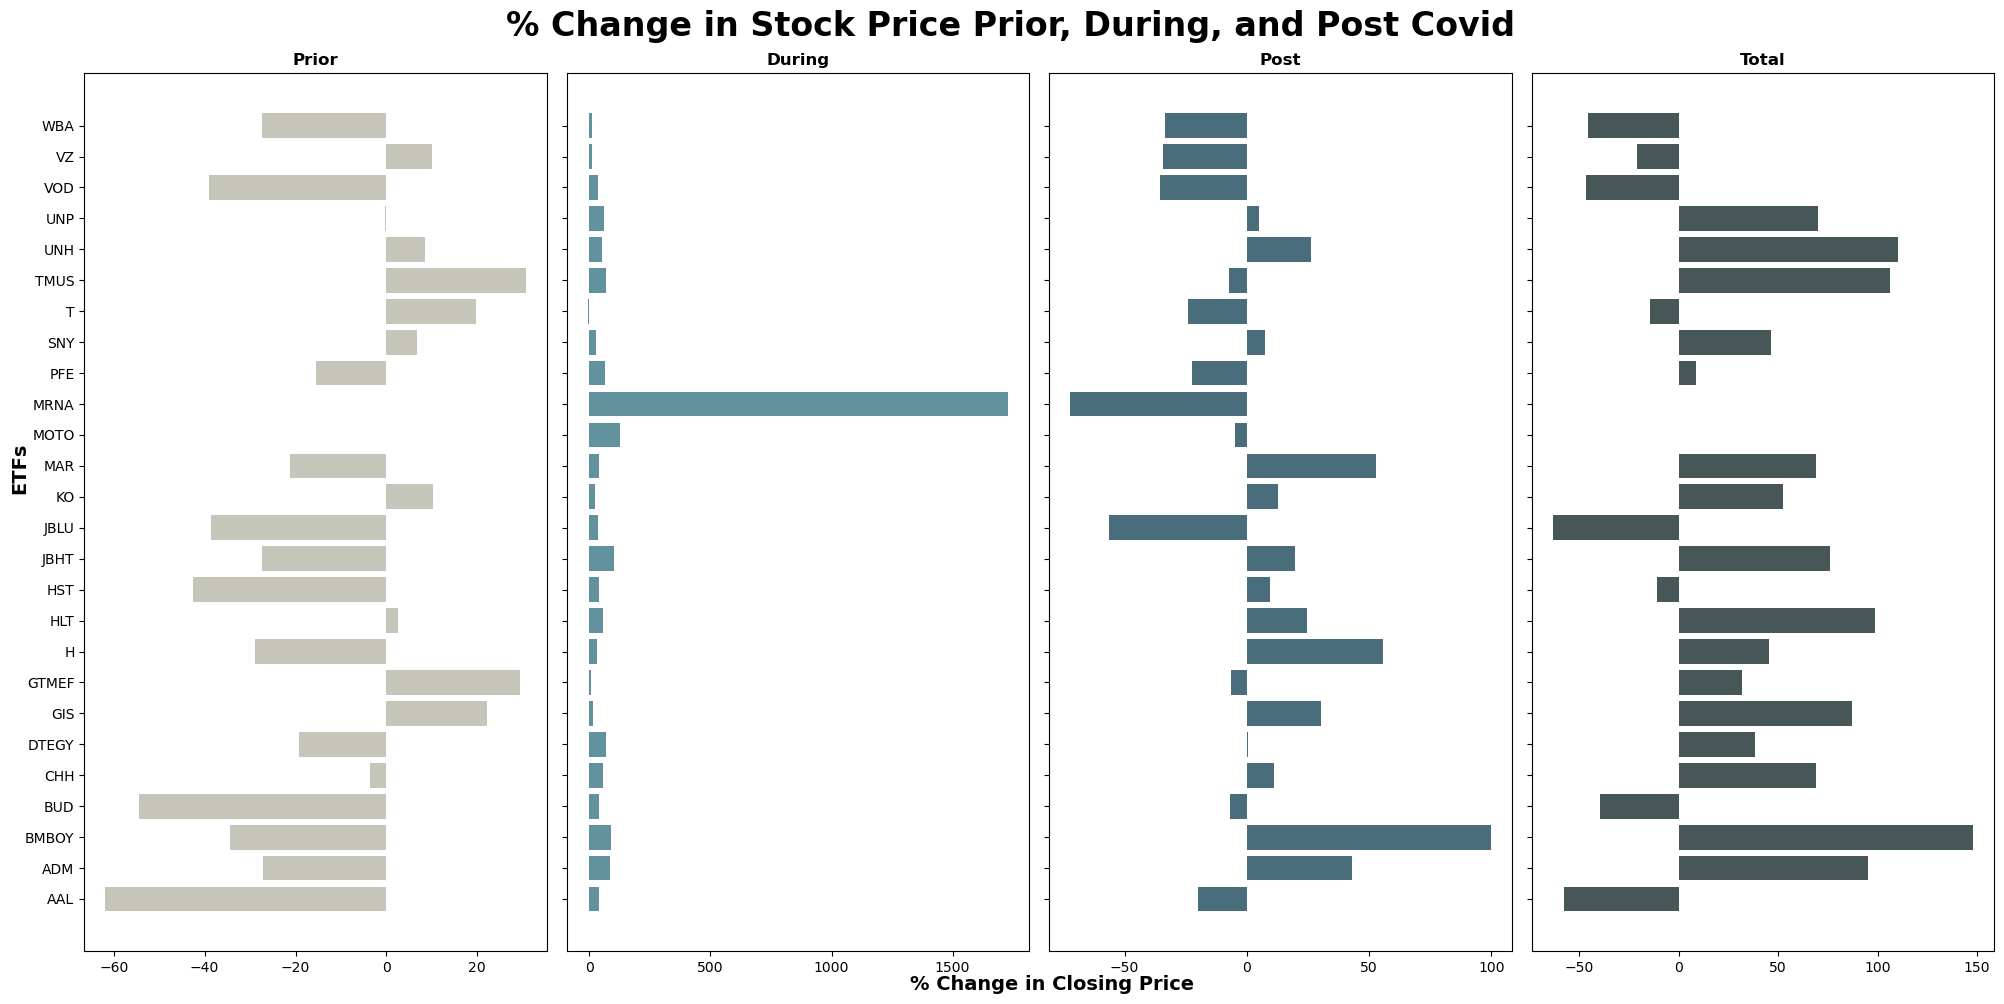

In [7]:
colors = ["#C6C5B9", "#62929E", '#4A6D7C', '#475657']

fig, axes = plt.subplots(1,4, figsize=(20, 10),sharey=True)

for i, j in enumerate(pcnt_change.keys()):
    ax = axes[i]    
    ax.barh(tickers, pcnt_change[j], color=colors[i])
    ax.set_title(j, fontweight ="bold")
    
    ## Supposed to put mean line on each axes, but not working yet
    #
    # mean = np.average(pcnt_change[j])
    # line = lines.Line2D([mean,-1],
    #                 [mean, 20],
    #                 lw = 2, color ='green', alpha = 0.7)
    # ax.add_line(line)

    
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
fig.text(0.45, 0, "% Change in Closing Price", fontweight="bold", fontsize=14)
fig.text(0, 0.5, "ETFs", rotation=90, fontweight ="bold", fontsize=14)
fig.suptitle("% Change in Stock Price Prior, During, and Post Covid", fontweight ="bold", fontsize=24)
fig.tight_layout()

plt.show()
# adapted from "Analyzing World Stock Indices Performances with Python"
# https://towardsdatascience.com/analyzing-world-stock-indices-performance-in-python-610df6a578f

### Line Graphs Stocks

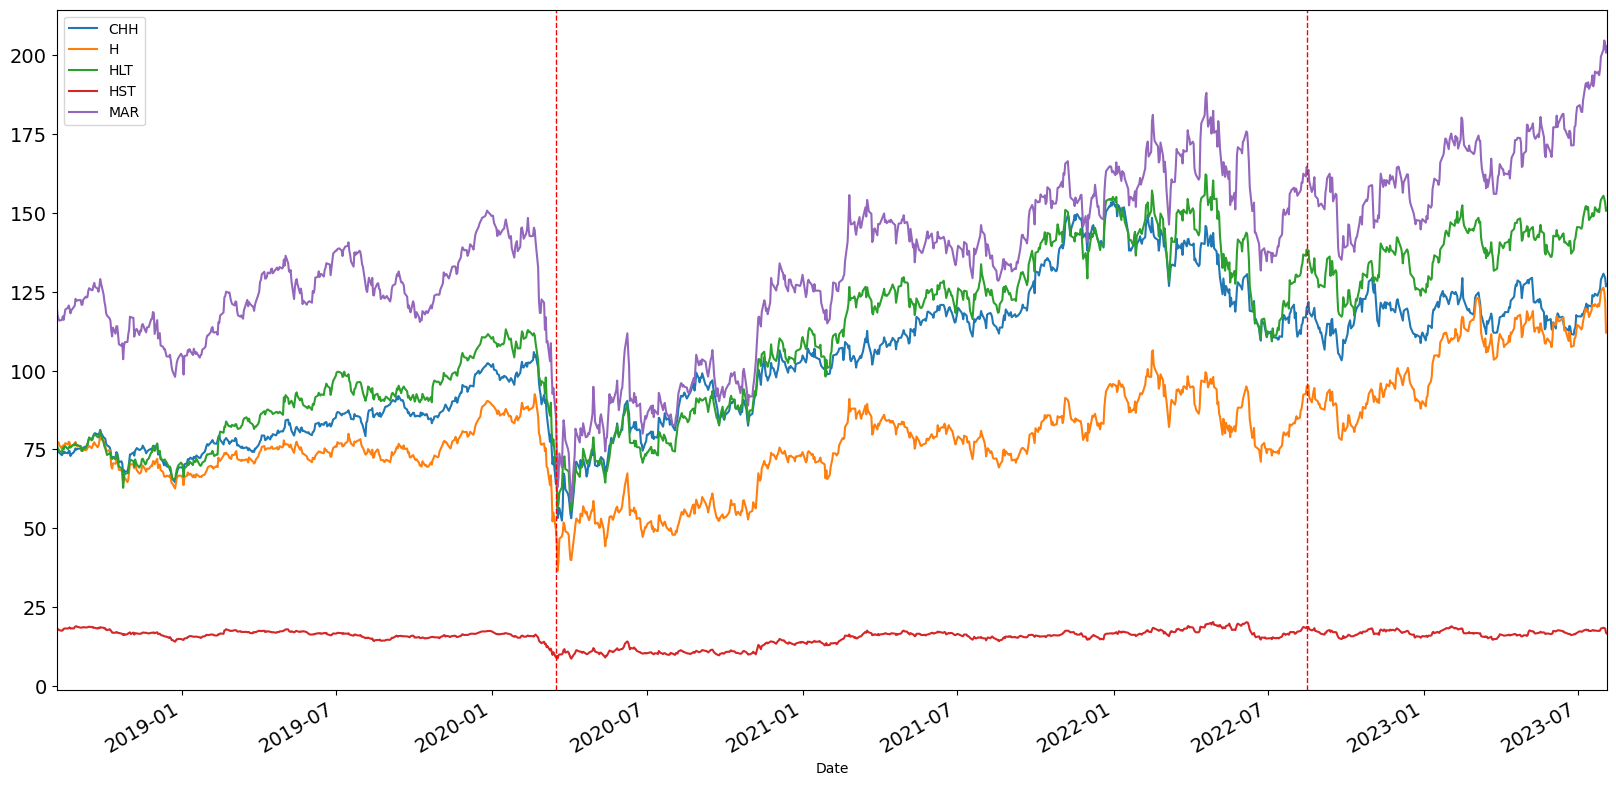

In [8]:
# Hospitality
hosp = stocks_hist_date.loc[stocks_hist_date["Sector"] == "hospitality"]
hosp_grp = hosp.groupby("Stock")
labels = hosp_grp.sum(numeric_only=True).index

hosp_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

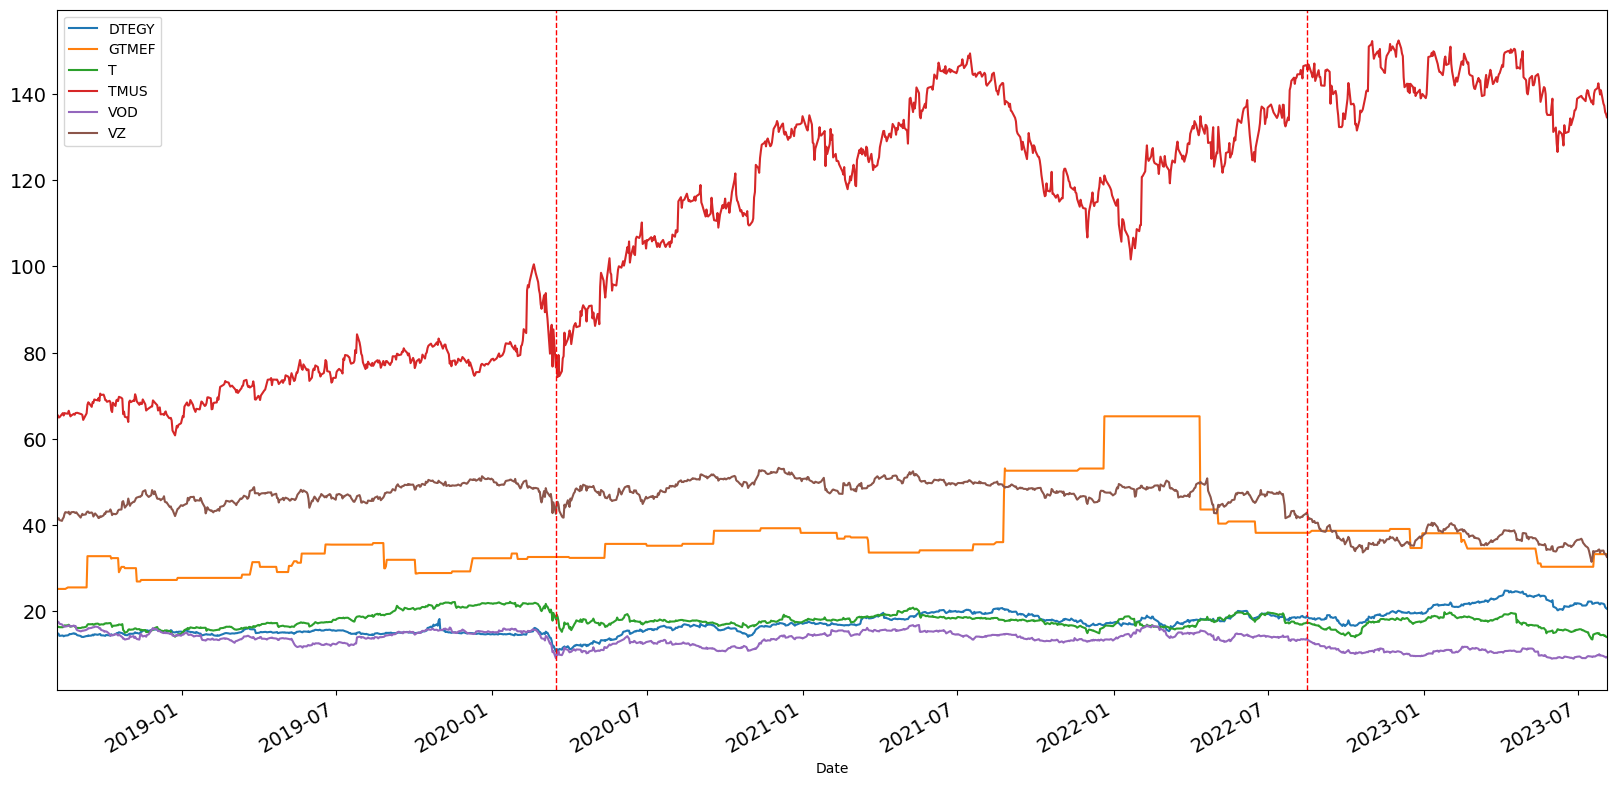

In [9]:
# Telecom
hosp = stocks_hist_date.loc[stocks_hist_date["Sector"] == "telecom"]
hosp_grp = hosp.groupby("Stock")
labels = hosp_grp.sum(numeric_only=True).index

hosp_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

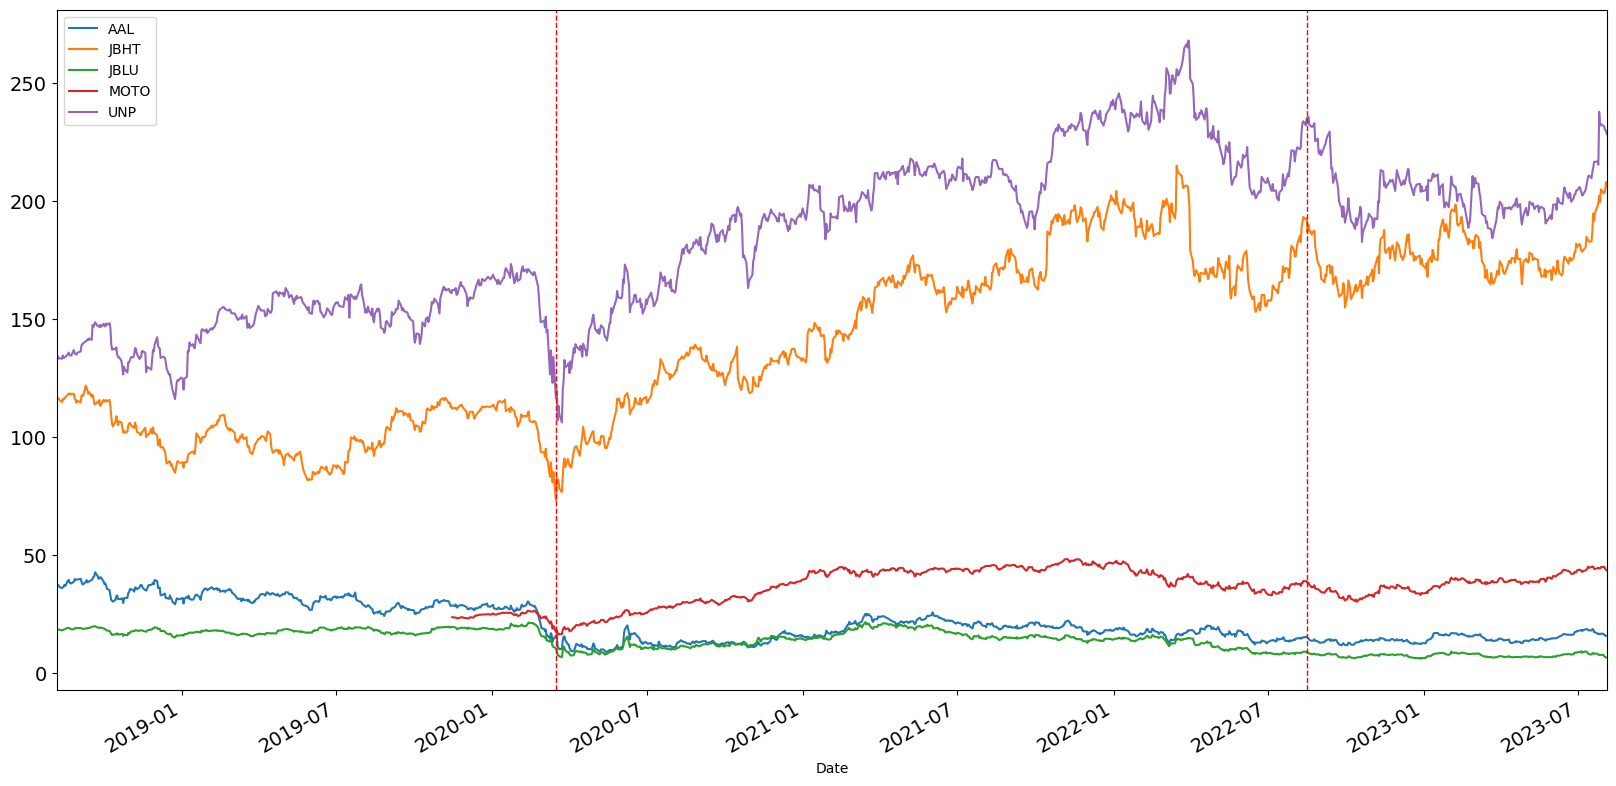

In [10]:
# Transportation
hosp = stocks_hist_date.loc[stocks_hist_date["Sector"] == "transportation"]
hosp_grp = hosp.groupby("Stock")
labels = hosp_grp.sum(numeric_only=True).index

hosp_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

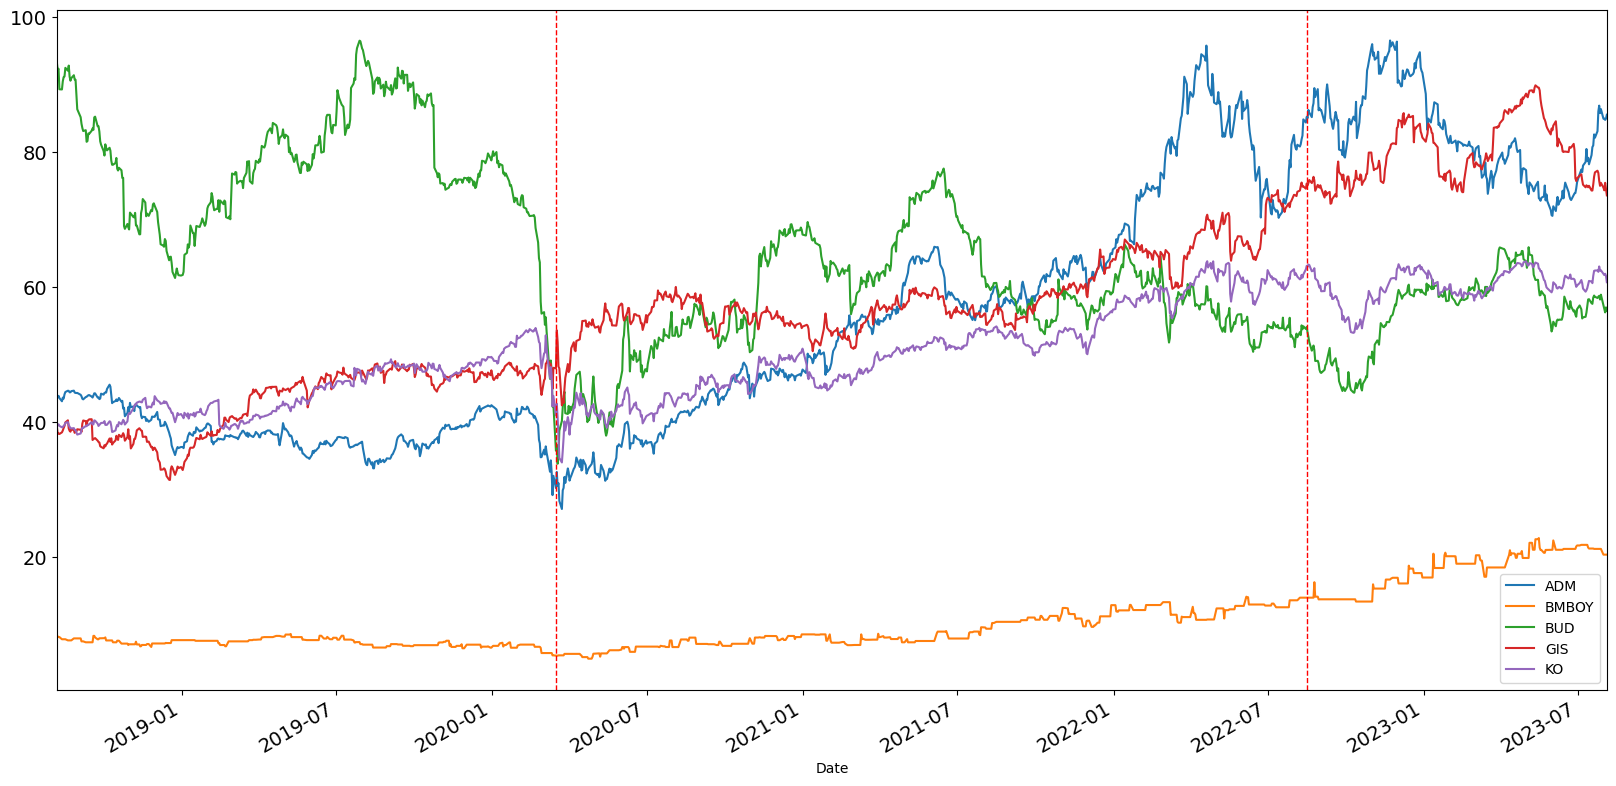

In [11]:
# Food and Beverage
hosp = stocks_hist_date.loc[stocks_hist_date["Sector"] == "foodbev"]
hosp_grp = hosp.groupby("Stock")
labels = hosp_grp.sum(numeric_only=True).index

hosp_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

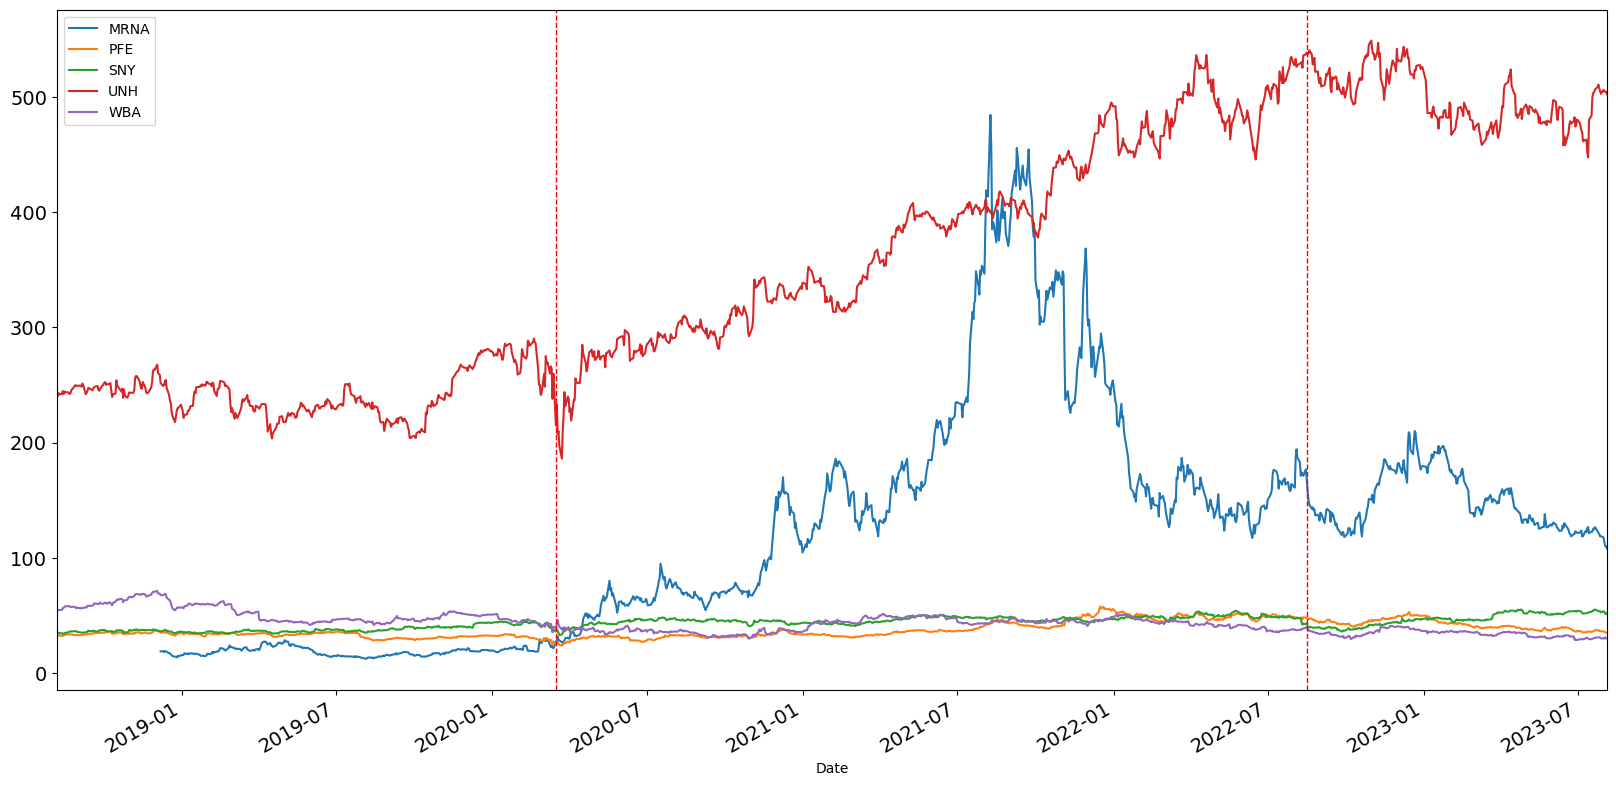

In [12]:
# Healthcare
hosp = stocks_hist_date.loc[stocks_hist_date["Sector"] == "healthcare"]
hosp_grp = hosp.groupby("Stock")
labels = hosp_grp.sum(numeric_only=True).index

hosp_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

/var/folders/_t/scbbyxlx46g2wd63k7994ztm0000gn/T/ipykernel_10457/2207039267.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  hosp_grp.plot(kind="line", x="Date", y="Close",


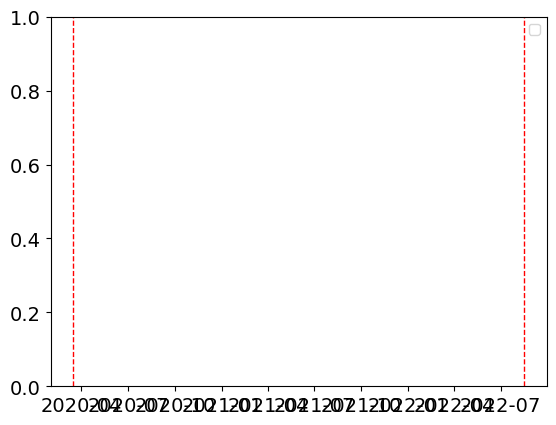

In [13]:
# Banking
hosp = stocks_hist_date.loc[stocks_hist_date["Sector"] == "banking"]
hosp_grp = hosp.groupby("Stock")
labels = hosp_grp.sum(numeric_only=True).index

hosp_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 figsize=(20,10)
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

## Next Steps - Jake
- Event Study / Event History Analysis
inflection point graphs
candle sticks

In [14]:
explore_df = stocks_hist_date.loc[stocks_hist_date["Stock"] == "H"]
explore_df = explore_df.reset_index()

<b style="background: yellow; color:black">NOTE:</b> Need to set xticks to dates


Inflection Points: ['2018-8-9', '2018-8-13', '2019-4-15', '2020-2-20', '2021-1-8', '2022-3-30', '2022-12-30']



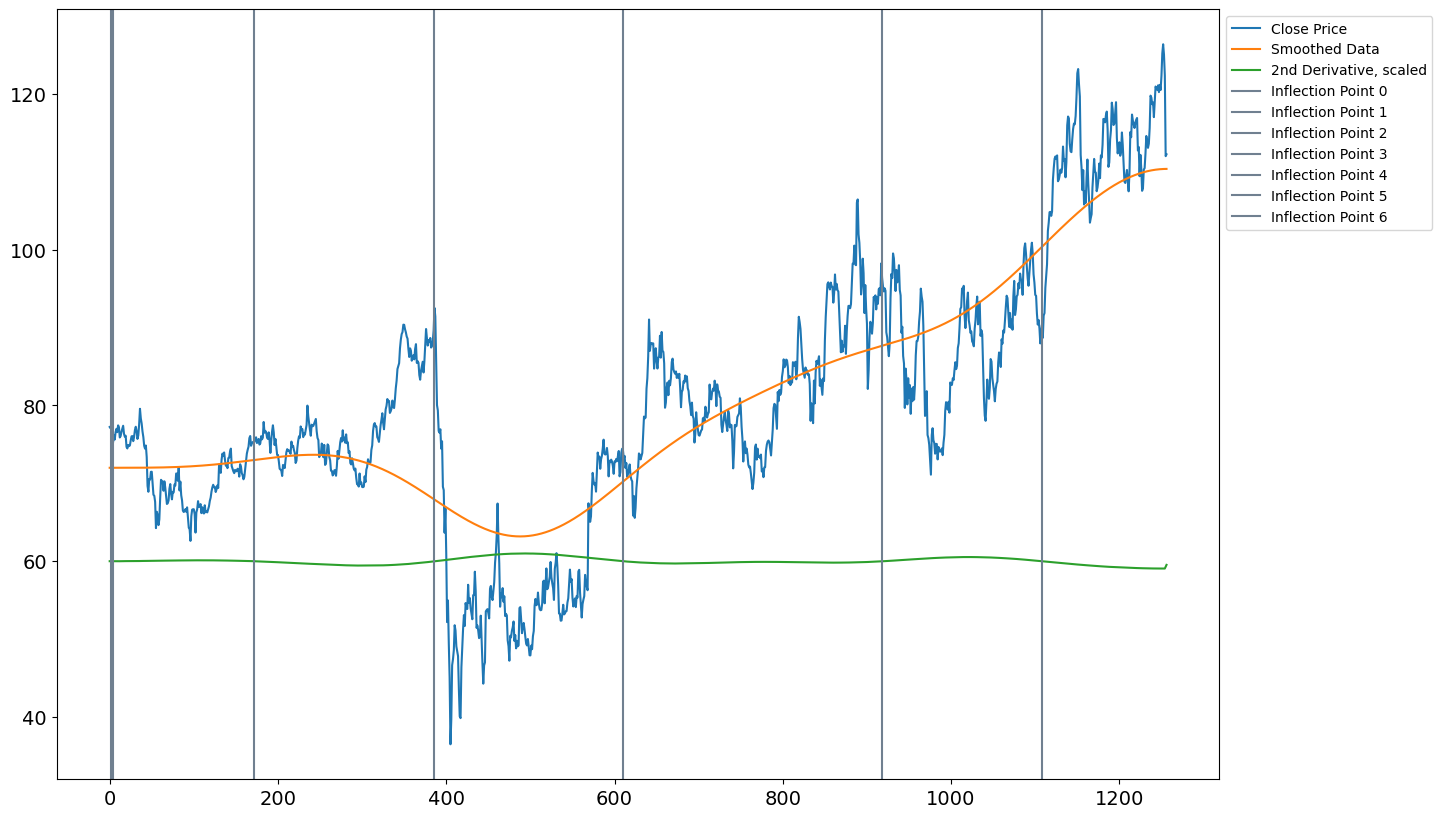

In [15]:
### Inflection Point Analysis
# explore_df_trunc = explore_df.loc[(explore_df["Date"] >= "2020-01-01") & (explore_df["Date"] <= "2021-01-01")]

# smooth noisy price data
smoothing = gaussian_filter1d(explore_df["Close"], 100)

# get second derivative
deriv2 = np.gradient(np.gradient(smoothing))

# get inflection points
inflection_points = np.where(np.diff(np.sign(deriv2)))[0]

# pair inflection points to dates
inflection_dates = []
for point in inflection_points:
    year = explore_df.iloc[point]["Date"].year
    month = explore_df.iloc[point]["Date"].month
    day = explore_df.iloc[point]["Date"].day
    inflection_dates.append(f'{year}-{month}-{day}')
print(f"\nInflection Points: {inflection_dates}\n")

# generate plot
fig1 = plt.figure(figsize=(15,10))
plt.plot(explore_df["Close"], label="Close Price")
plt.plot(smoothing, label="Smoothed Data")
plt.plot(deriv2/np.max(deriv2)+60, label="2nd Derivative, scaled")
for i, j in enumerate(inflection_points):
    plt.axvline(x=j,
               label=f"Inflection Point {i}",
               color="slategray")

plt.legend(bbox_to_anchor=(1, 1))

# loc = plt.xticks()
plt.show()

# adapted from Stack Overflow "How to find inflection point in python?", by norok2
# https://stackoverflow.com/questions/62537703/how-to-find-inflection-point-in-python

In [16]:
### Candle Plot, Stock analysis

fig2 = go.Figure(data=[go.Candlestick(x=explore_df['Date'],
                open=BEDZ['Open'],
                high=BEDZ['High'],
                low=BEDZ['Low'],
                close=BEDZ['Close'])],
                layout=go.Layout(autosize=True, height=700))

fig2.show()

NameError: name 'BEDZ' is not defined

Several examples of the _evening star_ stock analysis pattern are present in the weeks prior to US lockdowns being announced.
This pattern expresses the "stalling of buyers" according to Investopedia.
A candlestick chart could give greater visibily to market sentiment surrounding the expected effect of Covid safety measures on the underlying business behind many stocks.